In [0]:
sc.appName

Out[1]: 'Databricks Shell'

In [0]:
env

Out[2]: {'PATH': '/usr/local/nvidia/bin:/databricks/python3/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/snap/bin',
 'container': 'lxc',
 'DATABRICKS_CLUSTER_LIBS_R_ROOT_DIR': 'r',
 'DEFAULT_DATABRICKS_ROOT_VIRTUALENV_ENV': '/databricks/python3',
 'SPARK_ENV_LOADED': '1',
 'JAVA_OPTS': ' -Djava.io.tmpdir=/local_disk0/tmp -XX:MaxPermSize=512m -XX:-OmitStackTraceInFastThrow -Djava.security.properties=/databricks/spark/dbconf/java/extra.security -XX:-UseContainerSupport -XX:+PrintFlagsFinal -XX:+PrintGCDateStamps -XX:+PrintGCDetails -verbose:gc -Xss4m -Djava.library.path=/usr/java/packages/lib/amd64:/usr/lib64:/lib64:/lib:/usr/lib:/usr/lib/x86_64-linux-gnu/jni:/lib/x86_64-linux-gnu:/usr/lib/x86_64-linux-gnu:/usr/lib/jni -Djavax.xml.datatype.DatatypeFactory=com.sun.org.apache.xerces.internal.jaxp.datatype.DatatypeFactoryImpl -Djavax.xml.parsers.DocumentBuilderFactory=com.sun.org.apache.xerces.internal.jaxp.DocumentBuilderFactoryImpl -Djavax.xml.parsers.SAXParserFactory

In [0]:
# Lab 1
dbutils.fs.mkdirs("/FileStore/tables/")

Out[105]: True

In [0]:
dbutils.fs.ls("/FileStore/tables/")

In [0]:
%fs ls /FileStore/tables/

In [0]:
%sh ls -l /dbfs/

In [0]:
pwd

Out[107]: '/databricks/driver'

In [0]:
import os
for f in os.scandir():
    print (f.name, f.is_file())

conf False
azure False
hadoop_accessed_config.lst True
preload_class.lst True
logs False
metastore_db False
eventlogs False


In [0]:
os.listdir('conf')

Out[6]: ['spark-branch.conf']

In [0]:
# Create a new file called do.data and write "Some content" plus other infromation in it
file_name = 'do.dat'
with open (file_name, 'w') as fout:
    fout.write('Some content\nAnother line\nEnd')

In [0]:
# Read the file do.dat created above and print it's contents
with open(file_name, 'r') as fin:
    print(fin.read())

Some content
Another line
End


In [0]:
%sh pwd

/databricks/driver


In [0]:
%sh python -V

Python 3.8.10


In [0]:
# Lab 2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
!wget http://bit.ly/36je2mw -O /dbfs/cars.csv

--2023-03-20 17:19:52--  http://bit.ly/36je2mw
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/MikhailVV/DS/master/mtcars.csv [following]
--2023-03-20 17:19:52--  https://raw.githubusercontent.com/MikhailVV/DS/master/mtcars.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1501 (1.5K) [text/plain]
Saving to: ‘/dbfs/cars.csv’

/dbfs/cars.csv      100%[===================>]   1.47K  --.-KB/s    in 0s      

2023-03-20 17:19:53 (20.5 MB/s) - ‘/dbfs/cars.csv’ saved [1501/1501]



In [0]:
%sh ls -l /dbfs/

total 4
-rw-r--r-- 1 root root 1501 Mar 16 14:50 cars.csv


In [0]:
input_file = '/dbfs/cars.csv'
cars = pd.read_csv(input_file)

In [0]:
cars.index

Out[111]: Index(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230',
       'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC',
       'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial',
       'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona',
       'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird',
       'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L',
       'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype='object')

In [0]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   wt      32 non-null     float64
 5   qsec    32 non-null     float64
 6   am      32 non-null     int64  
 7   gear    32 non-null     int64  
 8   carb    32 non-null     int64  
dtypes: float64(4), int64(5)
memory usage: 2.5+ KB


In [0]:
cars.shape

Out[20]: (32, 9)

In [0]:
sns.set()
sns.set_style('whitegrid')

/databricks/python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Out[22]: <AxesSubplot:xlabel='hp', ylabel='Density'>

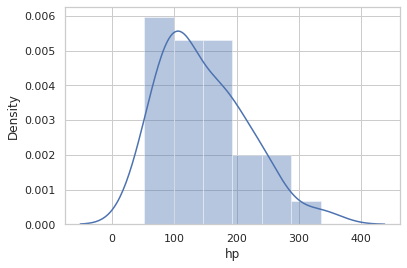

In [0]:
sns.distplot (cars.hp)

/databricks/python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Out[23]: <AxesSubplot:xlabel='hp', ylabel='Density'>

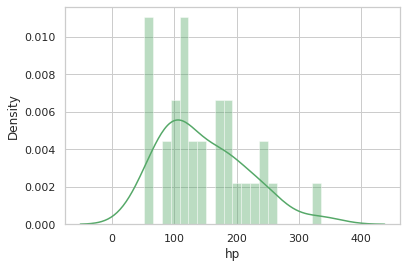

In [0]:
sns.distplot (cars.hp, color='g', bins=20)

Out[24]: <seaborn.axisgrid.JointGrid at 0x7faaabebaac0>

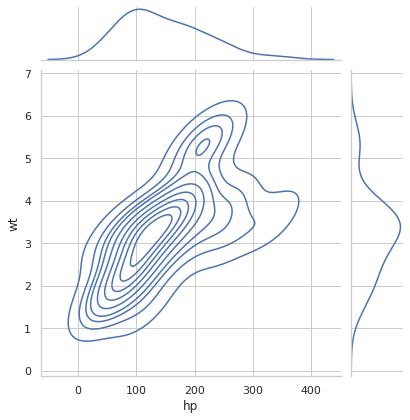

In [0]:
sns.jointplot(x="hp", y="wt", data=cars, kind="kde")

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Out[27]: <AxesSubplot:xlabel='qsec'>

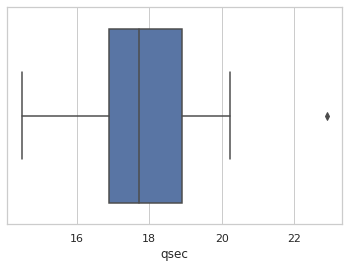

In [0]:
sns.boxplot(cars.qsec)

In [0]:
cars[cars.qsec > 22]

,mpg,cyl,disp,hp,wt,qsec,am,gear,carb
Merc 230,22.8,4,140.8,95,3.15,22.9,0,4,2


Out[29]: <seaborn.axisgrid.FacetGrid at 0x7faaa69c5cd0>

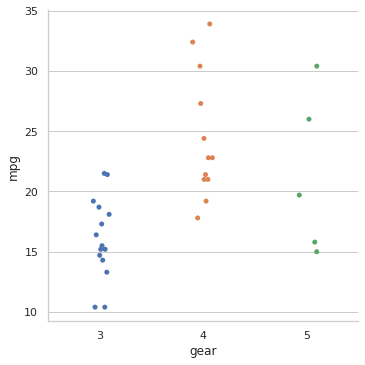

In [0]:
sns.catplot(x='gear', y = 'mpg', data = cars)

Out[30]: <seaborn.axisgrid.FacetGrid at 0x7faaa698e820>

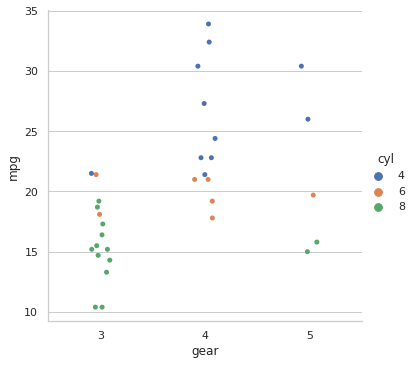

In [0]:
sns.catplot(x='gear', y = 'mpg', data = cars, hue = 'cyl')

Out[31]: <seaborn.axisgrid.FacetGrid at 0x7faaa698f550>

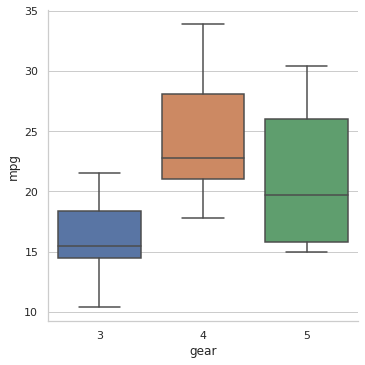

In [0]:
sns.catplot(x='gear', y = 'mpg', kind='box', data = cars)

Out[32]: <seaborn.axisgrid.FacetGrid at 0x7faaa6899bb0>

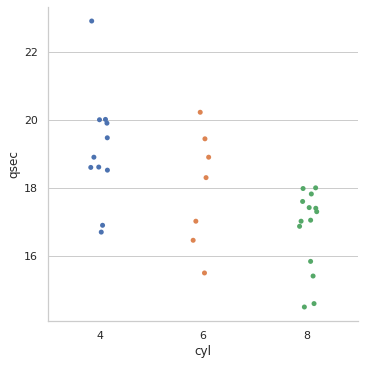

In [0]:
# Answer to question in Lab 2
sns.catplot(x='cyl', y = 'qsec', data = cars)

In [0]:
# Solution to question in Lab 2
pd.unique(cars.cyl)

Out[33]: array([6, 4, 8])

In [0]:
columns = ['hp', 'wt', 'mpg', 'cyl', 'disp', 'qsec']
df2 = cars [columns].copy()

In [0]:
df2.shape

Out[35]: (32, 6)

Out[36]: <seaborn.axisgrid.PairGrid at 0x7faaa67c8f40>

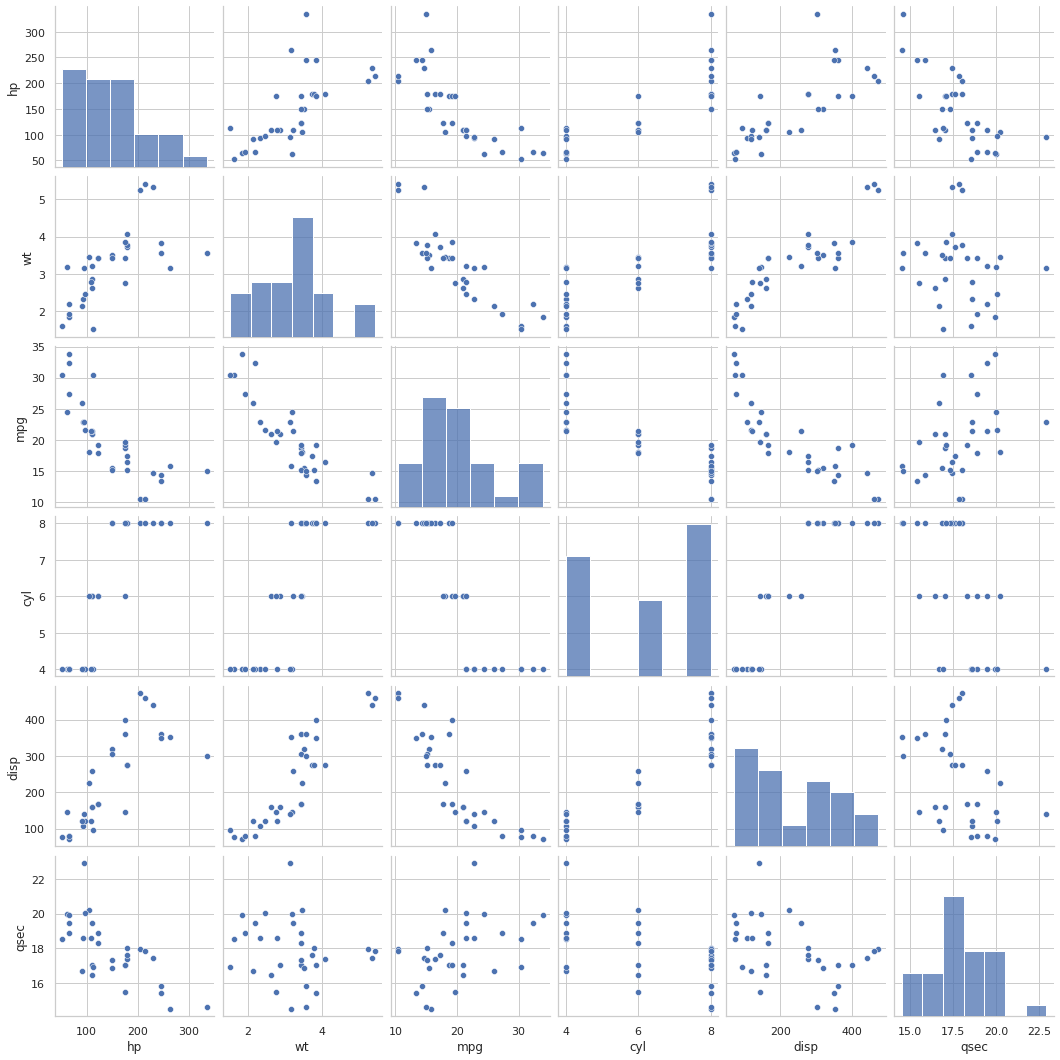

In [0]:
sns.pairplot(df2)

Out[11]: <seaborn.axisgrid.PairGrid at 0x7f6bad8de850>

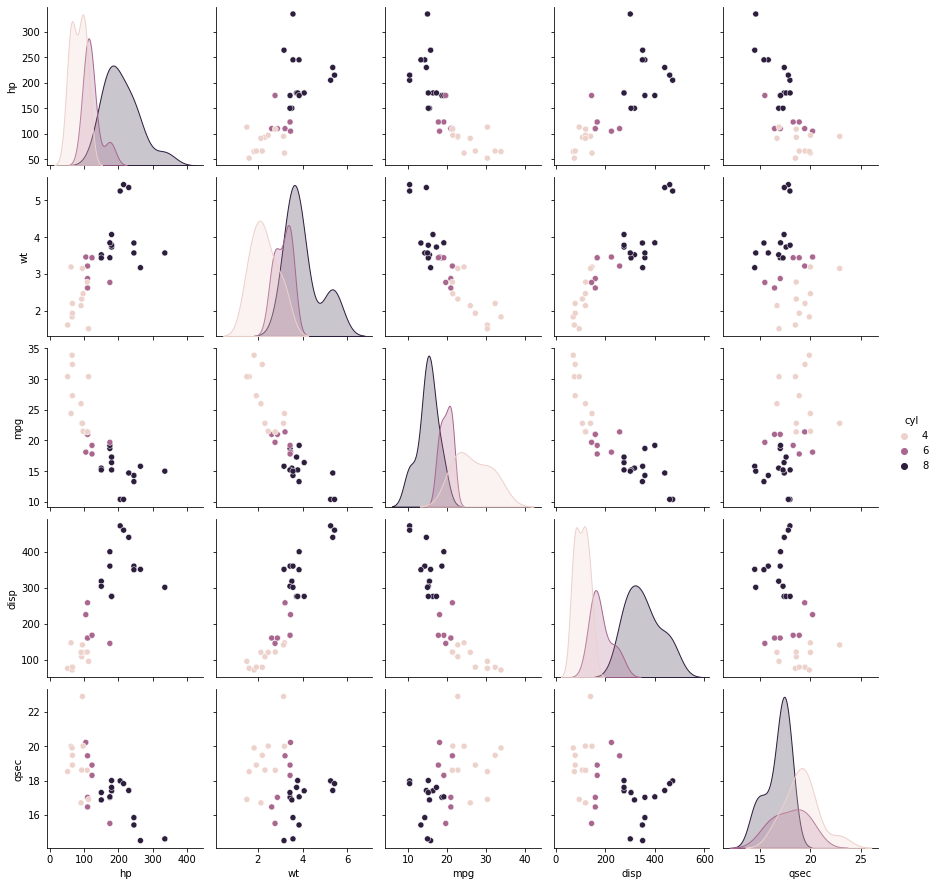

In [0]:
sns.pairplot(df2, hue='cyl')

In [0]:
set(cars.columns) - set(df2.columns)

Out[12]: {'am', 'carb', 'gear'}

Out[38]: <AxesSubplot:>

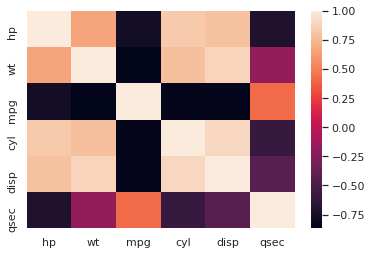

In [0]:
sns.heatmap(df2.corr())

In [0]:
# Lab 3
%matplotlib inline
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
lag = math.pi / 2.0
X = [x for x in range(0,20)]
effect = [math.sin(x) for x in X]
cause = [math.sin(x - lag) for x in X]
random.seed(3)
rnd = [random.random() for i in range(len(X))]

Out[21]: <matplotlib.legend.Legend at 0x7f6b9a8fa4c0>

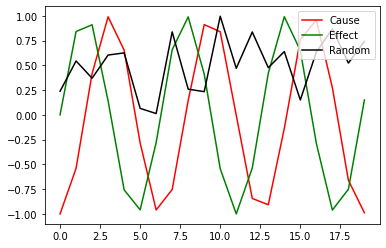

In [0]:
input = np.array( [cause, effect, rnd])

df = pd.DataFrame(input.T, columns = ['Cause', 'Effect', "Noise"])

plt.plot(X,df.Cause, c="red", label = 'Cause')
plt.plot(X, df.Effect, c='green', label = 'Effect')
plt.plot(X, df.Noise, c="black", label = 'Random')
plt.legend(loc='upper right')

In [0]:
df.corr()

,Cause,Effect,Noise
Cause,1.000000,-0.007682,0.071048
Effect,-0.007682,1.000000,-0.167193
Noise,0.071048,-0.167193,1.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cause   20 non-null     float64
 1   Effect  20 non-null     float64
 2   Noise   20 non-null     float64
dtypes: float64(3)
memory usage: 608.0 bytes


In [0]:
# Lab 4
who

X	 cars	 cause	 columns	 df	 df2	 effect	 f	 file_name	 
fin	 fout	 input	 input_file	 lag	 math	 np	 os	 pd	 
plt	 random	 rnd	 sns	 


In [0]:
type(spark)

Out[45]: pyspark.sql.session.SparkSession

In [0]:
print(dir(spark), sep = ' ')

['Builder', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_activeSession', '_convert_from_pandas', '_createFromLocal', '_createFromLocalTrusted', '_createFromRDD', '_create_dataframe', '_create_from_pandas_with_arrow', '_create_rdd_from_local_trusted', '_create_shell_session', '_get_numpy_record_dtype', '_get_pandas_num_slices', '_inferSchema', '_inferSchemaFromList', '_instantiatedSession', '_jsc', '_jsparkSession', '_jvm', '_jwrapped', '_repr_html_', '_sc', '_wrap_data_schema', '_wrapped', '_write_to_trusted_path', 'builder', 'catalog', 'conf', 'createDataFrame', 'getActiveSession', 'newSession', 'range', 'read', 'readStream', 'sparkContext', 'sql', 'stop', 'streams

In [0]:
from pyspark.sql import SparkSession
spark_0 = SparkSession.builder \
.master('local') \
.appName('My Session') \
.config('key', 'value')\
.getOrCreate()

In [0]:
spark_0

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.2.1 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
# Lab 5
!wget http://bit.ly/36je2mw -O /dbfs/cars.csv

--2023-03-20 18:09:34--  http://bit.ly/36je2mw
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/MikhailVV/DS/master/mtcars.csv [following]
--2023-03-20 18:09:34--  https://raw.githubusercontent.com/MikhailVV/DS/master/mtcars.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1501 (1.5K) [text/plain]
Saving to: ‘/dbfs/cars.csv’

/dbfs/cars.csv      100%[===================>]   1.47K  --.-KB/s    in 0s      

2023-03-20 18:09:35 (16.5 MB/s) - ‘/dbfs/cars.csv’ saved [1501/1501]



In [0]:
%sh ls -l /dbfs/

total 4
-rw-r--r-- 1 root root 1501 Mar 20 18:09 cars.csv


In [0]:
import pandas as pd
input_file = '/dbfs/cars.csv'
cars = pd.read_csv(input_file, header=None, skiprows=2)


In [0]:
cars

,0,1,2,3,4,5,6,7,8,9
0,Mazda RX4 Wag,21.0,6,160.0,110,2.875,17.02,1,4,4
1,Datsun 710,22.8,4,108.0,93,2.320,18.61,1,4,1
2,Hornet 4 Drive,21.4,6,258.0,110,3.215,19.44,0,3,1
3,Hornet Sportabout,18.7,8,360.0,175,3.440,17.02,0,3,2
4,Valiant,18.1,6,225.0,105,3.460,20.22,0,3,1
5,Duster 360,14.3,8,360.0,245,3.570,15.84,0,3,4
6,Merc 240D,24.4,4,146.7,62,3.190,20.00,0,4,2
7,Merc 230,22.8,4,140.8,95,3.150,22.90,0,4,2
8,Merc 280,19.2,6,167.6,123,3.440,18.30,0,4,4
9,Merc 280C,17.8,6,167.6,123,3.440,18.90,0,4,4


In [0]:
df_cars= spark.createDataFrame(cars,['name','mpg','cyl','disp','hp','wt','qsec','am','gear','carb'])

In [0]:
type(df_cars)

Out[62]: pyspark.sql.dataframe.DataFrame

In [0]:
df_cars.columns

Out[63]: ['name', 'mpg', 'cyl', 'disp', 'hp', 'wt', 'qsec', 'am', 'gear', 'carb']

In [0]:
df_cars.dtypes

Out[64]: [('name', 'string'),
 ('mpg', 'double'),
 ('cyl', 'bigint'),
 ('disp', 'double'),
 ('hp', 'bigint'),
 ('wt', 'double'),
 ('qsec', 'double'),
 ('am', 'bigint'),
 ('gear', 'bigint'),
 ('carb', 'bigint')]

In [0]:
df_cars = df_cars.withColumnRenamed('mpg', 'milespergallon')

In [0]:
df_cars.columns

Out[50]: ['name', 'milespergallon', 'cyl', 'disp', 'hp', 'wt', 'qsec', 'am', 'gear']

In [0]:
df.cars = df_cars.withColumnRenamed('milespergallon', 'mpg')

In [0]:
df_cars.schema

Out[66]: StructType(List(StructField(name,StringType,true),StructField(mpg,DoubleType,true),StructField(cyl,LongType,true),StructField(disp,DoubleType,true),StructField(hp,LongType,true),StructField(wt,DoubleType,true),StructField(qsec,DoubleType,true),StructField(am,LongType,true),StructField(gear,LongType,true),StructField(carb,LongType,true)))

In [0]:
df_cars.printSchema()

root
 |-- name: string (nullable = true)
 |-- mpg: double (nullable = true)
 |-- cyl: long (nullable = true)
 |-- disp: double (nullable = true)
 |-- hp: long (nullable = true)
 |-- wt: double (nullable = true)
 |-- qsec: double (nullable = true)
 |-- am: long (nullable = true)
 |-- gear: long (nullable = true)
 |-- carb: long (nullable = true)



In [0]:
df_cars.show()

+-------------------+----+---+-----+---+-----+-----+---+----+----+
|               name| mpg|cyl| disp| hp|   wt| qsec| am|gear|carb|
+-------------------+----+---+-----+---+-----+-----+---+----+----+
|      Mazda RX4 Wag|21.0|  6|160.0|110|2.875|17.02|  1|   4|   4|
|         Datsun 710|22.8|  4|108.0| 93| 2.32|18.61|  1|   4|   1|
|     Hornet 4 Drive|21.4|  6|258.0|110|3.215|19.44|  0|   3|   1|
|  Hornet Sportabout|18.7|  8|360.0|175| 3.44|17.02|  0|   3|   2|
|            Valiant|18.1|  6|225.0|105| 3.46|20.22|  0|   3|   1|
|         Duster 360|14.3|  8|360.0|245| 3.57|15.84|  0|   3|   4|
|          Merc 240D|24.4|  4|146.7| 62| 3.19| 20.0|  0|   4|   2|
|           Merc 230|22.8|  4|140.8| 95| 3.15| 22.9|  0|   4|   2|
|           Merc 280|19.2|  6|167.6|123| 3.44| 18.3|  0|   4|   4|
|          Merc 280C|17.8|  6|167.6|123| 3.44| 18.9|  0|   4|   4|
|         Merc 450SE|16.4|  8|275.8|180| 4.07| 17.4|  0|   3|   3|
|         Merc 450SL|17.3|  8|275.8|180| 3.73| 17.6|  0|   3| 

In [0]:
dbutils.fs.mkdirs("/FileStore/tables/")
save_file = '/FileStore/cars/'
df_cars.write.csv(save_file, mode = 'overwrite', header = True)  

In [0]:
%fs ls /FileStore/cars

path,name,size,modificationTime
dbfs:/FileStore/cars/_committed_1261750339292516164,_committed_1261750339292516164,1431,1679336259000
dbfs:/FileStore/cars/_committed_30973495554446331,_committed_30973495554446331,206,1678977226000
dbfs:/FileStore/cars/_committed_3208074945179355802,_committed_3208074945179355802,1439,1678984600000
dbfs:/FileStore/cars/_committed_6579800790444309651,_committed_6579800790444309651,812,1678978851000
dbfs:/FileStore/cars/_committed_8495417480884063118,_committed_8495417480884063118,1431,1679336701000
dbfs:/FileStore/cars/_committed_9076348411163000556,_committed_9076348411163000556,1439,1679336227000
dbfs:/FileStore/cars/_committed_vacuum8179489056718534696,_committed_vacuum8179489056718534696,160,1679336228000
dbfs:/FileStore/cars/_started_1261750339292516164,_started_1261750339292516164,0,1679336258000
dbfs:/FileStore/cars/_started_8495417480884063118,_started_8495417480884063118,0,1679336701000
dbfs:/FileStore/cars/_started_9076348411163000556,_started_9076348411163000556,0,1679336226000


In [0]:
df2 = spark.read.option("inferSchema", "true").csv(save_file, header = True)

In [0]:
df2.printSchema()

root
 |-- name: string (nullable = true)
 |-- mpg: double (nullable = true)
 |-- cyl: integer (nullable = true)
 |-- disp: double (nullable = true)
 |-- hp: integer (nullable = true)
 |-- wt: double (nullable = true)
 |-- qsec: double (nullable = true)
 |-- am: integer (nullable = true)
 |-- gear: integer (nullable = true)
 |-- carb: integer (nullable = true)



In [0]:
df2.collect()

Out[77]: [Row(name='Merc 450SL', mpg=17.3, cyl=8, disp=275.8, hp=180, wt=3.73, qsec=17.6, am=0, gear=3, carb=3),
 Row(name='Merc 450SLC', mpg=15.2, cyl=8, disp=275.8, hp=180, wt=3.78, qsec=18.0, am=0, gear=3, carb=3),
 Row(name='Cadillac Fleetwood', mpg=10.4, cyl=8, disp=472.0, hp=205, wt=5.25, qsec=17.98, am=0, gear=3, carb=4),
 Row(name='Lincoln Continental', mpg=10.4, cyl=8, disp=460.0, hp=215, wt=5.424, qsec=17.82, am=0, gear=3, carb=4),
 Row(name='Toyota Corona', mpg=21.5, cyl=4, disp=120.1, hp=97, wt=2.465, qsec=20.01, am=0, gear=3, carb=1),
 Row(name='Dodge Challenger', mpg=15.5, cyl=8, disp=318.0, hp=150, wt=3.52, qsec=16.87, am=0, gear=3, carb=2),
 Row(name='AMC Javelin', mpg=15.2, cyl=8, disp=304.0, hp=150, wt=3.435, qsec=17.3, am=0, gear=3, carb=2),
 Row(name='Camaro Z28', mpg=13.3, cyl=8, disp=350.0, hp=245, wt=3.84, qsec=15.41, am=0, gear=3, carb=4),
 Row(name='Pontiac Firebird', mpg=19.2, cyl=8, disp=400.0, hp=175, wt=3.845, qsec=17.05, am=0, gear=3, carb=2),
 Row(name='F

In [0]:
from pyspark.sql import Row
row1 = Row(job_category=6, name='Mark', performance=47.87)
row2 = Row(job_category=7, name='Jill', performance=92.99)
dfr = spark.createDataFrame([row1, row2])
dfr.show()

+------------+----+-----------+
|job_category|name|performance|
+------------+----+-----------+
|           6|Mark|      47.87|
|           7|Jill|      92.99|
+------------+----+-----------+



In [0]:
dfr.printSchema()

root
 |-- job_category: long (nullable = true)
 |-- name: string (nullable = true)
 |-- performance: double (nullable = true)



In [0]:
emp_name = ['Mark', 'Jill', 'Gus', 'Mahomet', 'Rob']
perf = [47.87, 92.99, 56.78,89.62, 82.13]
job_cat = [6,7,5,7,8]
rows = [Row(name = n, performance = p, job_category = j) \
for n, p, j in zip(emp_name, perf, job_cat)]
dfr = spark.createDataFrame(rows)
dfr.show()

+-------+-----------+------------+
|   name|performance|job_category|
+-------+-----------+------------+
|   Mark|      47.87|           6|
|   Jill|      92.99|           7|
|    Gus|      56.78|           5|
|Mahomet|      89.62|           7|
|    Rob|      82.13|           8|
+-------+-----------+------------+



In [0]:
tuples = [(n, p, j) for n, p, j in zip(emp_name, perf, job_cat)]
dft = spark.createDataFrame(tuples, ['name', 'performance', 'job_category'])
dft.show()

+-------+-----------+------------+
|   name|performance|job_category|
+-------+-----------+------------+
|   Mark|      47.87|           6|
|   Jill|      92.99|           7|
|    Gus|      56.78|           5|
|Mahomet|      89.62|           7|
|    Rob|      82.13|           8|
+-------+-----------+------------+



In [0]:
# Lab 6
import pandas as pd
input_file = 'http://bit.ly/36fGR32'
pandf = pd.read_csv(input_file); pandf.head(4)

,FNAME,FSIZE,MONTH,DAY
0,a2p,112200,Feb,21
1,abrt-action-analyze-backtrace,13896,Feb,22
2,abrt-action-analyze-c,12312,Feb,22
3,abrt-action-analyze-core,6676,Feb,22


In [0]:
df_files = spark.createDataFrame (pandf)

In [0]:
df_files.dtypes

Out[91]: [('FNAME', 'string'),
 ('FSIZE', 'bigint'),
 ('MONTH', 'string'),
 ('DAY', 'bigint')]

In [0]:
df_files.printSchema()

root
 |-- FNAME: string (nullable = true)
 |-- FSIZE: long (nullable = true)
 |-- MONTH: string (nullable = true)
 |-- DAY: long (nullable = true)



In [0]:
pandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FNAME   1280 non-null   object
 1   FSIZE   1280 non-null   int64 
 2   MONTH   1280 non-null   object
 3   DAY     1280 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 40.1+ KB


In [0]:
df_files.summary().show()

+-------+------------+-----------------+-----+-----------------+
|summary|       FNAME|            FSIZE|MONTH|              DAY|
+-------+------------+-----------------+-----+-----------------+
|  count|        1280|             1280| 1280|             1280|
|   mean|        null|     91119.934375| null|      18.07109375|
| stddev|        null|424254.9286399977| null|6.115038082433262|
|    min|ControlPanel|                2|  Apr|                2|
|    25%|        null|             1054| null|               11|
|    50%|        null|            16072| null|               21|
|    75%|        null|            38944| null|               22|
|    max|     zsoelim|          8713256|  Sep|               31|
+-------+------------+-----------------+-----+-----------------+



In [0]:
df_files.summary('count').show()

+-------+-----+-----+-----+----+
|summary|FNAME|FSIZE|MONTH| DAY|
+-------+-----+-----+-----+----+
|  count| 1280| 1280| 1280|1280|
+-------+-----+-----+-----+----+



In [0]:
df_files.dtypes

Out[96]: [('FNAME', 'string'),
 ('FSIZE', 'bigint'),
 ('MONTH', 'string'),
 ('DAY', 'bigint')]

In [0]:
df_files.select ('*').show()

+--------------------+------+-----+---+
|               FNAME| FSIZE|MONTH|DAY|
+--------------------+------+-----+---+
|                 a2p|112200|  Feb| 21|
|abrt-action-analy...| 13896|  Feb| 22|
|abrt-action-analy...| 12312|  Feb| 22|
|abrt-action-analy...|  6676|  Feb| 22|
|abrt-action-analy...| 10720|  Feb| 22|
|abrt-action-analy...| 11016|  Feb| 22|
|abrt-action-gener...| 14536|  Feb| 22|
|abrt-action-gener...| 14840|  Feb| 22|
|abrt-action-insta...|  7575|  Feb| 22|
|abrt-action-list-...|  2759|  Feb| 22|
|abrt-action-save-...| 27104|  Feb| 22|
|abrt-action-trim-...| 15808|  Feb| 22|
|            abrt-cli| 18648|  Feb| 22|
|   abrt-dedup-client| 29128|  Feb| 22|
|      abrt-dump-oops| 20632|  Feb| 22|
|  abrt-handle-upload|  3352|  Feb| 22|
|                  ac| 24816|  Jul| 17|
|             aclocal| 31181|  Feb| 21|
|        aclocal-1.11| 31181|  Feb| 21|
|            aconnect| 22824|  Feb| 21|
+--------------------+------+-----+---+
only showing top 20 rows



In [0]:
df_files.select('FNAME', 'DAY', 'MONTH').show(5)

+--------------------+---+-----+
|               FNAME|DAY|MONTH|
+--------------------+---+-----+
|                 a2p| 21|  Feb|
|abrt-action-analy...| 22|  Feb|
|abrt-action-analy...| 22|  Feb|
|abrt-action-analy...| 22|  Feb|
|abrt-action-analy...| 22|  Feb|
+--------------------+---+-----+
only showing top 5 rows



In [0]:
df_files.select(df_files.FNAME, df_files.DAY, df_files.MONTH).show(5)

+--------------------+---+-----+
|               FNAME|DAY|MONTH|
+--------------------+---+-----+
|                 a2p| 21|  Feb|
|abrt-action-analy...| 22|  Feb|
|abrt-action-analy...| 22|  Feb|
|abrt-action-analy...| 22|  Feb|
|abrt-action-analy...| 22|  Feb|
+--------------------+---+-----+
only showing top 5 rows



In [0]:
df_files.select ('FNAME', 'DAY', 'MONTH')\
.filter ( (df_files.MONTH == 'Nov') & (df_files.DAY == 11)).show(3)

+---------+---+-----+
|    FNAME|DAY|MONTH|
+---------+---+-----+
|addftinfo| 11|  Nov|
|autopoint| 11|  Nov|
|     chvt| 11|  Nov|
+---------+---+-----+
only showing top 3 rows



In [0]:
type(df_files.DAY)

Out[101]: pyspark.sql.column.Column

In [0]:
df_files.select('DAY').collect()

Out[102]: [Row(DAY=21),
 Row(DAY=22),
 Row(DAY=22),
 Row(DAY=22),
 Row(DAY=22),
 Row(DAY=22),
 Row(DAY=22),
 Row(DAY=22),
 Row(DAY=22),
 Row(DAY=22),
 Row(DAY=22),
 Row(DAY=22),
 Row(DAY=22),
 Row(DAY=22),
 Row(DAY=22),
 Row(DAY=22),
 Row(DAY=17),
 Row(DAY=21),
 Row(DAY=21),
 Row(DAY=21),
 Row(DAY=18),
 Row(DAY=22),
 Row(DAY=11),
 Row(DAY=21),
 Row(DAY=12),
 Row(DAY=23),
 Row(DAY=21),
 Row(DAY=21),
 Row(DAY=21),
 Row(DAY=21),
 Row(DAY=16),
 Row(DAY=21),
 Row(DAY=21),
 Row(DAY=23),
 Row(DAY=21),
 Row(DAY=23),
 Row(DAY=21),
 Row(DAY=23),
 Row(DAY=21),
 Row(DAY=21),
 Row(DAY=21),
 Row(DAY=21),
 Row(DAY=7),
 Row(DAY=30),
 Row(DAY=23),
 Row(DAY=23),
 Row(DAY=23),
 Row(DAY=22),
 Row(DAY=22),
 Row(DAY=22),
 Row(DAY=10),
 Row(DAY=5),
 Row(DAY=10),
 Row(DAY=10),
 Row(DAY=21),
 Row(DAY=21),
 Row(DAY=11),
 Row(DAY=10),
 Row(DAY=10),
 Row(DAY=10),
 Row(DAY=22),
 Row(DAY=21),
 Row(DAY=23),
 Row(DAY=10),
 Row(DAY=22),
 Row(DAY=21),
 Row(DAY=30),
 Row(DAY=10),
 Row(DAY=7),
 Row(DAY=11),
 Row(DAY=21),

In [0]:
list ( map( lambda r: r.DAY, df_files.select('DAY').collect()[:5]))

Out[103]: [21, 22, 22, 22, 22]

In [0]:
days = [r.DAY for r in df_files.select('DAY').collect()]; days

Out[104]: [21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 17,
 21,
 21,
 21,
 18,
 22,
 11,
 21,
 12,
 23,
 21,
 21,
 21,
 21,
 16,
 21,
 21,
 23,
 21,
 23,
 21,
 23,
 21,
 21,
 21,
 21,
 7,
 30,
 23,
 23,
 23,
 22,
 22,
 22,
 10,
 5,
 10,
 10,
 21,
 21,
 11,
 10,
 10,
 10,
 22,
 21,
 23,
 10,
 22,
 21,
 30,
 10,
 7,
 11,
 21,
 4,
 10,
 7,
 7,
 7,
 7,
 18,
 7,
 22,
 21,
 7,
 7,
 7,
 7,
 23,
 23,
 23,
 23,
 24,
 24,
 24,
 24,
 23,
 24,
 21,
 21,
 21,
 21,
 22,
 2,
 23,
 21,
 21,
 23,
 18,
 18,
 18,
 18,
 18,
 22,
 21,
 7,
 7,
 23,
 21,
 22,
 10,
 10,
 22,
 22,
 22,
 11,
 22,
 21,
 10,
 10,
 10,
 22,
 16,
 18,
 21,
 21,
 10,
 23,
 10,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 23,
 21,
 25,
 11,
 22,
 19,
 22,
 21,
 22,
 23,
 21,
 21,
 22,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 19,
 19,
 19,
 4,
 4,
 4,
 4,
 4,
 10,
 13,
 4,
 10,
 22,
 11,
 22,
 25,
 25,
 23,
 10,
 10,
 21,
 22,
 22,
 22,
 5,
 21,
 22,
 21,
 22,
 11,
 16,
 11,
 11,
 11,
 11,
 23,
 21,
 11,
 11,
 23,
 11,


In [0]:
sorted(days)[:20]

Out[158]: [2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [0]:
sorted(days)[-20:]

Out[159]: [30,
 30,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31]

In [0]:
df_files.select('DAY').distinct().show(31)

+---+
|DAY|
+---+
| 19|
| 22|
|  7|
| 25|
| 17|
|  5|
| 10|
| 12|
| 11|
|  2|
|  4|
| 18|
| 21|
| 30|
| 23|
| 16|
| 24|
|  3|
| 13|
| 15|
| 26|
| 31|
| 20|
|  9|
| 28|
| 14|
| 29|
|  8|
+---+



In [0]:
df_files.select('DAY').distinct().count()

Out[106]: 28

In [0]:
df_max_day = df_files.groupBy('MONTH').agg({'DAY' : 'max'})
df_max_day.show()

+-----+--------+
|MONTH|max(DAY)|
+-----+--------+
|  Sep|      26|
|  Dec|      31|
|  Aug|      25|
|  Jun|      25|
|  Feb|      24|
|  Nov|      29|
|  Jan|      30|
|  Apr|      23|
|  Jul|      31|
|  Oct|      10|
|  Mar|      17|
|  May|      22|
+-----+--------+



In [0]:
df_min_day = df_files.groupBy('MONTH').agg({'DAY' : 'min'})
df_min_day.show()

+-----+--------+
|MONTH|min(DAY)|
+-----+--------+
|  Sep|       7|
|  Dec|       2|
|  Aug|       7|
|  Jun|      13|
|  Feb|      21|
|  Nov|      10|
|  Jan|       8|
|  Apr|       3|
|  Jul|      12|
|  Oct|       4|
|  Mar|       3|
|  May|      19|
+-----+--------+



In [0]:
df_join = df_max_day.join(df_min_day, 'MONTH'); df_join.show()

+-----+--------+--------+
|MONTH|max(DAY)|min(DAY)|
+-----+--------+--------+
|  Sep|      26|       7|
|  Dec|      31|       2|
|  Aug|      25|       7|
|  Jun|      25|      13|
|  Feb|      24|      21|
|  Nov|      29|      10|
|  Jan|      30|       8|
|  Apr|      23|       3|
|  Jul|      31|      12|
|  Oct|      10|       4|
|  Mar|      17|       3|
|  May|      22|      19|
+-----+--------+--------+



In [0]:
df_report = df_join.select \
('MONTH',(df_join['max(DAY)'] -df_join['min(DAY)']).alias('DAYS_DIFF')) 
df_report.show()

+-----+---------+
|MONTH|DAYS_DIFF|
+-----+---------+
|  Sep|       19|
|  Dec|       29|
|  Aug|       18|
|  Jun|       12|
|  Feb|        3|
|  Nov|       19|
|  Jan|       22|
|  Apr|       20|
|  Jul|       19|
|  Oct|        6|
|  Mar|       14|
|  May|        3|
+-----+---------+



In [0]:
df_report_sorted = df_report.sort(df_report.DAYS_DIFF.desc())
df_report_sorted.show()

+-----+---------+
|MONTH|DAYS_DIFF|
+-----+---------+
|  Dec|       29|
|  Jan|       22|
|  Apr|       20|
|  Sep|       19|
|  Jul|       19|
|  Nov|       19|
|  Aug|       18|
|  Mar|       14|
|  Jun|       12|
|  Oct|        6|
|  Feb|        3|
|  May|        3|
+-----+---------+



In [0]:
dfc = df_files.groupBy('MONTH').agg({'*' : 'count'});
dfc.show()

+-----+--------+
|MONTH|count(1)|
+-----+--------+
|  Sep|      66|
|  Dec|     103|
|  Aug|      93|
|  Jun|     129|
|  Feb|     279|
|  Nov|     221|
|  Jan|       5|
|  Apr|     305|
|  Jul|      63|
|  Oct|       9|
|  Mar|       2|
|  May|       5|
+-----+--------+



In [0]:
dfr = dfc.withColumnRenamed('count(1)', 'fc')
dfr.sort(dfr.fc.desc())
dfr.show(5)

+-----+---+
|MONTH| fc|
+-----+---+
|  Sep| 66|
|  Dec|103|
|  Aug| 93|
|  Jun|129|
|  Feb|279|
+-----+---+
only showing top 5 rows



In [0]:
import pyspark.sql.functions as sf
df_sf = df_files.groupBy('MONTH').agg(sf.count('*').alias('fc'))
df_sf_sorted = df_sf.sort('fc')
df_sf_sorted.show(5)

+-----+---+
|MONTH| fc|
+-----+---+
|  Mar|  2|
|  Jan|  5|
|  May|  5|
|  Oct|  9|
|  Jul| 63|
+-----+---+
only showing top 5 rows



In [0]:
df.summary().show()

+-------+------------+-----------------+-----+-----------------+
|summary|       FNAME|            FSIZE|MONTH|              DAY|
+-------+------------+-----------------+-----+-----------------+
|  count|        1280|             1280| 1280|             1280|
|   mean|        null|     91119.934375| null|      18.07109375|
| stddev|        null|424254.9286399977| null|6.115038082433262|
|    min|ControlPanel|                2|  Apr|                2|
|    25%|        null|             1054| null|               11|
|    50%|        null|            16072| null|               21|
|    75%|        null|            38944| null|               22|
|    max|     zsoelim|          8713256|  Sep|               31|
+-------+------------+-----------------+-----+-----------------+



In [0]:
import pyspark.sql.functions as sf
rmin = (df_files.agg(sf.min(df_files.FSIZE).alias('mn')).collect()[0])
df_files.select('FNAME', 'FSIZE')\
.filter( df_files.FSIZE ==  rmin.mn).show()

+-----------+-----+
|      FNAME|FSIZE|
+-----------+-----+
|        atq|    2|
|       atrm|    2|
|ghostscript|    2|
|         lz|    2|
|      lzcat|    2|
|       lzma|    2|
|     mcedit|    2|
|     mcview|    2|
|     unlzma|    2|
|       unxz|    2|
|      xzcat|    2|
+-----------+-----+



In [0]:
rdd = df_files.rdd 
min_size = rdd.map(lambda r: r.FSIZE).reduce (lambda x,y: min(x,y))
rdd.filter(lambda r: r.FSIZE == min_size)\
.map(lambda f: f.FNAME).collect()

Out[138]: ['atq',
 'atrm',
 'ghostscript',
 'lz',
 'lzcat',
 'lzma',
 'mcedit',
 'mcview',
 'unlzma',
 'unxz',
 'xzcat']

In [0]:
df_report_sorted.explain(True)

== Parsed Logical Plan ==
Sort [DAYS_DIFF#5566L DESC NULLS LAST], true
+- Project [MONTH#4388, (max(DAY)#5422L - min(DAY)#5449L) AS DAYS_DIFF#5566L]
   +- Project [MONTH#4388, max(DAY)#5422L, min(DAY)#5449L]
      +- Join Inner, (MONTH#4388 = MONTH#5474)
         :- Aggregate [MONTH#4388], [MONTH#4388, max(DAY#4389L) AS max(DAY)#5422L]
         :  +- LogicalRDD [FNAME#4386, FSIZE#4387L, MONTH#4388, DAY#4389L], false
         +- Aggregate [MONTH#5474], [MONTH#5474, min(DAY#5475L) AS min(DAY)#5449L]
            +- LogicalRDD [FNAME#5472, FSIZE#5473L, MONTH#5474, DAY#5475L], false

== Analyzed Logical Plan ==
MONTH: string, DAYS_DIFF: bigint
Sort [DAYS_DIFF#5566L DESC NULLS LAST], true
+- Project [MONTH#4388, (max(DAY)#5422L - min(DAY)#5449L) AS DAYS_DIFF#5566L]
   +- Project [MONTH#4388, max(DAY)#5422L, min(DAY)#5449L]
      +- Join Inner, (MONTH#4388 = MONTH#5474)
         :- Aggregate [MONTH#4388], [MONTH#4388, max(DAY#4389L) AS max(DAY)#5422L]
         :  +- LogicalRDD [FNAME#4386, FS

In [0]:
# Lab 7
df_with_nulls = spark.createDataFrame([(None, None), (1.0, None),
(float('nan'), 2.0), (11.0, 22.0)], ("A", "B"))
df_with_nulls.show()

+----+----+
|   A|   B|
+----+----+
|null|null|
| 1.0|null|
| NaN| 2.0|
|11.0|22.0|
+----+----+



In [0]:
df_with_nulls.dropna(how='all').show()

+----+----+
|   A|   B|
+----+----+
| 1.0|null|
| NaN| 2.0|
|11.0|22.0|
+----+----+



In [0]:
df_with_nulls.dropna(how='any').show()

+----+----+
|   A|   B|
+----+----+
|11.0|22.0|
+----+----+



In [0]:
df_with_nulls.na.fill(0).show()

+----+----+
|   A|   B|
+----+----+
| 0.0| 0.0|
| 1.0| 0.0|
| 0.0| 2.0|
|11.0|22.0|
+----+----+



In [0]:
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols=["A", "B"], outputCols=["out_a", "out_b"])
model = imputer.fit(df_with_nulls)
df_mean = model.transform(df_with_nulls)
df_mean.show()

+----+----+-----+-----+
|   A|   B|out_a|out_b|
+----+----+-----+-----+
|null|null|  6.0| 12.0|
| 1.0|null|  1.0| 12.0|
| NaN| 2.0|  6.0|  2.0|
|11.0|22.0| 11.0| 22.0|
+----+----+-----+-----+



In [0]:
df_mean = df_mean.select ('out_a', 'out_b')

In [0]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.linalg import DenseVector
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import Normalizer
from math import *

In [0]:
veca = VectorAssembler(inputCols = ['out_a', 'out_b'], \
outputCol = 'feature_vector')
df_feat = veca.transform(df_mean)
df_feat.show()

+-----+-----+--------------+
|out_a|out_b|feature_vector|
+-----+-----+--------------+
|  6.0| 12.0|    [6.0,12.0]|
|  1.0| 12.0|    [1.0,12.0]|
|  6.0|  2.0|     [6.0,2.0]|
| 11.0| 22.0|   [11.0,22.0]|
+-----+-----+--------------+



In [0]:
normalizer = Normalizer(inputCol="feature_vector",
outputCol="features")
normalizer.transform(df_feat).collect()

Out[149]: [Row(out_a=6.0, out_b=12.0, feature_vector=DenseVector([6.0, 12.0]), features=DenseVector([0.4472, 0.8944])),
 Row(out_a=1.0, out_b=12.0, feature_vector=DenseVector([1.0, 12.0]), features=DenseVector([0.083, 0.9965])),
 Row(out_a=6.0, out_b=2.0, feature_vector=DenseVector([6.0, 2.0]), features=DenseVector([0.9487, 0.3162])),
 Row(out_a=11.0, out_b=22.0, feature_vector=DenseVector([11.0, 22.0]), features=DenseVector([0.4472, 0.8944]))]

In [0]:
df_norm = df_feat.select ('feature_vector')
df_norm.rdd.map(lambda c: c[0][0] / sqrt (pow( c[0][0],2) + pow(c[0][1],2))).collect()

Out[190]: [0.4472135954999579,
 0.08304547985373997,
 0.9486832980505138,
 0.4472135954999579]

In [0]:
# Lab 8
!wget https://bit.ly/3dt2FOb -O /dbfs/mock_data.json

--2023-03-20 19:38:38--  https://bit.ly/3dt2FOb
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/MikhailVV/Python/main/MOCK_DATA_crlf.json [following]
--2023-03-20 19:38:38--  https://raw.githubusercontent.com/MikhailVV/Python/main/MOCK_DATA_crlf.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 157043 (153K) [text/plain]
Saving to: ‘/dbfs/mock_data.json’

/dbfs/mock_data.jso 100%[===================>] 153.36K  --.-KB/s    in 0.02s   

2023-03-20 19:38:38 (6.75 MB/s) - ‘/dbfs/mock_data.json’ saved [157043/157043]



In [0]:
%sh ls -l /dbfs/

total 160
-rw-r--r-- 1 root root   1501 Mar 20 18:09 cars.csv
-rw-r--r-- 1 root root 157043 Mar 20 19:38 mock_data.json


In [0]:
mock = pd.read_json('/dbfs/mock_data.json', lines=True)
df_m= spark.createDataFrame(mock) 
df_m.show(5)

+---+----------+------------+--------------------+--------------------+--------------------+
| id|first_name|   last_name|           job_title|        company_name|               email|
+---+----------+------------+--------------------+--------------------+--------------------+
|  1|   Wilhelm|       Romke|        Programmer I|Hegmann, Thompson...|wromke0@guardian....|
|  2|  Rachelle|MacCallister|Automation Specia...| Lebsack-Oberbrunner|rmaccallister1@bl...|
|  3|   Patrick|       Kayes|Compensation Analyst|Parker, Kuhn and ...|pkayes2@list-mana...|
|  4|    Gerard|      Truitt|    Quality Engineer|McDermott, King a...|  gtruitt3@upenn.edu|
|  5|    Fayina|      Samuel|    Junior Executive|   Cummings and Sons|    fsamuel4@cdc.gov|
+---+----------+------------+--------------------+--------------------+--------------------+
only showing top 5 rows



In [0]:
parq_file = '/FileStore/parquet_mock_data_snappy'
df.write.parquet (parq_file, compression='snappy')

In [0]:
%fs ls /FileStore/parquet_mock_data_snappy/

path,name,size,modificationTime
dbfs:/FileStore/parquet_mock_data1_snappy/_SUCCESS,_SUCCESS,0,1678987724000
dbfs:/FileStore/parquet_mock_data1_snappy/_committed_5730869933823166034,_committed_5730869933823166034,824,1678987724000
dbfs:/FileStore/parquet_mock_data1_snappy/_started_5730869933823166034,_started_5730869933823166034,0,1678987724000
dbfs:/FileStore/parquet_mock_data1_snappy/part-00000-tid-5730869933823166034-834b5911-347f-433d-89a6-90f4a51133dc-555-1-c000.snappy.parquet,part-00000-tid-5730869933823166034-834b5911-347f-433d-89a6-90f4a51133dc-555-1-c000.snappy.parquet,11056,1678987724000
dbfs:/FileStore/parquet_mock_data1_snappy/part-00001-tid-5730869933823166034-834b5911-347f-433d-89a6-90f4a51133dc-556-1-c000.snappy.parquet,part-00001-tid-5730869933823166034-834b5911-347f-433d-89a6-90f4a51133dc-556-1-c000.snappy.parquet,10911,1678987724000
dbfs:/FileStore/parquet_mock_data1_snappy/part-00002-tid-5730869933823166034-834b5911-347f-433d-89a6-90f4a51133dc-557-1-c000.snappy.parquet,part-00002-tid-5730869933823166034-834b5911-347f-433d-89a6-90f4a51133dc-557-1-c000.snappy.parquet,11018,1678987724000
dbfs:/FileStore/parquet_mock_data1_snappy/part-00003-tid-5730869933823166034-834b5911-347f-433d-89a6-90f4a51133dc-558-1-c000.snappy.parquet,part-00003-tid-5730869933823166034-834b5911-347f-433d-89a6-90f4a51133dc-558-1-c000.snappy.parquet,10988,1678987724000
dbfs:/FileStore/parquet_mock_data1_snappy/part-00004-tid-5730869933823166034-834b5911-347f-433d-89a6-90f4a51133dc-559-1-c000.snappy.parquet,part-00004-tid-5730869933823166034-834b5911-347f-433d-89a6-90f4a51133dc-559-1-c000.snappy.parquet,10826,1678987724000
dbfs:/FileStore/parquet_mock_data1_snappy/part-00005-tid-5730869933823166034-834b5911-347f-433d-89a6-90f4a51133dc-560-1-c000.snappy.parquet,part-00005-tid-5730869933823166034-834b5911-347f-433d-89a6-90f4a51133dc-560-1-c000.snappy.parquet,10703,1678987724000
dbfs:/FileStore/parquet_mock_data1_snappy/part-00006-tid-5730869933823166034-834b5911-347f-433d-89a6-90f4a51133dc-561-1-c000.snappy.parquet,part-00006-tid-5730869933823166034-834b5911-347f-433d-89a6-90f4a51133dc-561-1-c000.snappy.parquet,10710,1678987724000


In [0]:
parq_file = '/FileStore/parquet_mock_data_gzip'
df.write.parquet (parq_file, compression='gzip')

In [0]:
%fs ls /FileStore/parquet_mock_data_gzip/

path,name,size,modificationTime
dbfs:/FileStore/parquet_mock_data1_gzip/_SUCCESS,_SUCCESS,0,1678987739000
dbfs:/FileStore/parquet_mock_data1_gzip/_committed_7531603415172687596,_committed_7531603415172687596,792,1678987739000
dbfs:/FileStore/parquet_mock_data1_gzip/_started_7531603415172687596,_started_7531603415172687596,0,1678987738000
dbfs:/FileStore/parquet_mock_data1_gzip/part-00000-tid-7531603415172687596-4355b9bd-08b7-47ef-b02c-0965cc32ef73-563-1-c000.gz.parquet,part-00000-tid-7531603415172687596-4355b9bd-08b7-47ef-b02c-0965cc32ef73-563-1-c000.gz.parquet,7803,1678987738000
dbfs:/FileStore/parquet_mock_data1_gzip/part-00001-tid-7531603415172687596-4355b9bd-08b7-47ef-b02c-0965cc32ef73-564-1-c000.gz.parquet,part-00001-tid-7531603415172687596-4355b9bd-08b7-47ef-b02c-0965cc32ef73-564-1-c000.gz.parquet,7938,1678987738000
dbfs:/FileStore/parquet_mock_data1_gzip/part-00002-tid-7531603415172687596-4355b9bd-08b7-47ef-b02c-0965cc32ef73-565-1-c000.gz.parquet,part-00002-tid-7531603415172687596-4355b9bd-08b7-47ef-b02c-0965cc32ef73-565-1-c000.gz.parquet,7977,1678987738000
dbfs:/FileStore/parquet_mock_data1_gzip/part-00003-tid-7531603415172687596-4355b9bd-08b7-47ef-b02c-0965cc32ef73-566-1-c000.gz.parquet,part-00003-tid-7531603415172687596-4355b9bd-08b7-47ef-b02c-0965cc32ef73-566-1-c000.gz.parquet,7884,1678987738000
dbfs:/FileStore/parquet_mock_data1_gzip/part-00004-tid-7531603415172687596-4355b9bd-08b7-47ef-b02c-0965cc32ef73-567-1-c000.gz.parquet,part-00004-tid-7531603415172687596-4355b9bd-08b7-47ef-b02c-0965cc32ef73-567-1-c000.gz.parquet,7822,1678987738000
dbfs:/FileStore/parquet_mock_data1_gzip/part-00005-tid-7531603415172687596-4355b9bd-08b7-47ef-b02c-0965cc32ef73-568-1-c000.gz.parquet,part-00005-tid-7531603415172687596-4355b9bd-08b7-47ef-b02c-0965cc32ef73-568-1-c000.gz.parquet,7762,1678987738000
dbfs:/FileStore/parquet_mock_data1_gzip/part-00006-tid-7531603415172687596-4355b9bd-08b7-47ef-b02c-0965cc32ef73-569-1-c000.gz.parquet,part-00006-tid-7531603415172687596-4355b9bd-08b7-47ef-b02c-0965cc32ef73-569-1-c000.gz.parquet,7771,1678987738000


In [0]:
%fs ls /FileStore/parquet_mock_data1_gzip/part-00000-tid-4844481532666782315-97f397bc-53e6-471d-a447-a811690d1163-425-1-c000.gz.parquet

path,name,size,modificationTime
dbfs:/FileStore/parquet_mock_data_gzip/part-00000-tid-4844481532666782315-97f397bc-53e6-471d-a447-a811690d1163-425-1-c000.gz.parquet,part-00000-tid-4844481532666782315-97f397bc-53e6-471d-a447-a811690d1163-425-1-c000.gz.parquet,9352,1678982140000


In [0]:
import pandas as pd
parq_file_fs = 'FileStore/parquet_mock_data_gzip/part-00000-*'
df_pq =spark.read.parquet(parq_file_fs)
df_pq.show(5)

+-------+--------------------+--------------------+------------------------+---------------------+--------------------+-------------------------------+
|{"id":1|first_name:"Wilhelm"|   last_name:"Romke"|job_title:"Programmer I"|company_name:"Hegmann| Thompson and Bogan"|email:"wromke0@guardian.co.uk"}|
+-------+--------------------+--------------------+------------------------+---------------------+--------------------+-------------------------------+
|{"id":2|first_name:"Rache...|last_name:"MacCal...|    job_title:"Automa...| company_name:"Leb...|email:"rmaccallis...|                           null|
|{"id":3|first_name:"Patrick"|   last_name:"Kayes"|    job_title:"Compen...| company_name:"Parker| Kuhn and Considine"|           email:"pkayes2@li...|
|{"id":4| first_name:"Gerard"|  last_name:"Truitt"|    job_title:"Qualit...| company_name:"McD...|    King and Rempel"|           email:"gtruitt3@u...|
|{"id":5| first_name:"Fayina"|  last_name:"Samuel"|    job_title:"Junior...| company_nam